# What is Keras?


* Keras is an open source Python library for easily building neural networks. The library is capable of running on top of TensorFlow, Microsoft Cognitive Toolkit, Theano and MXNet. Tensorflow and Theano are the most used numerical platforms in Python when building deep learning algorithms, but they can be quite complex and difficult to use. By comparison, Keras provides an easy and convenient way to build deep learning models.

* Keras creator François Chollet developed the library to help people build neural networks as quickly and easily as possible, putting a focus on extensibility, modularity, minimalism and Python support. Keras can be used with GPUs and CPUs and it supports both Python 2 and 3.

* Google Keras made a big contribution to the commoditization of deep learning and artificial intelligence since it has commoditized powerful, modern deep learning algorithms that were not only previously inaccessible, but unusable as well.

In [1]:
import tensorflow as tf
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from matplotlib import style
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline





In [2]:
vocab_size=85000
max_len=300
batch_size=42

# What is Sentiment Analysis?

* Sentiment analysis aims to determine the attitude, or sentiment. For example, a speaker or writer with respect to a document, interaction, or event. It is a natural language processing problem in which text needs to be understood to predict the underlying intent.

* The sentiment is mostly categorized into positive, negative and neutral categories. Through sentiment analysis we might want to predict, for example, a customer's opinion and attitude about a product based on a review they wrote. This technique is widely applied to things like reviews, surveys, documents and much more.

# The imdb Dataset

* The IMDB sentiment classification dataset consists of 50,000 movie reviews from IMDB users that are labeled as either positive (1) or negative (0). The reviews are preprocessed and each one is encoded as a sequence of word indexes in the form of integers. The words within the reviews are indexed by their overall frequency within the dataset. For example, the integer “2” encodes the second most frequent word in the data. The 50,000 reviews are split into 25,000 for training and 25,000 for testing.

* The dataset was created by researchers at Stanford University and published in a 2011 paper, where they achieved 88.89% accuracy. It was also used within the “Bag of Words Meets Bags of Popcorn” Kaggle competition in 2011.

In [3]:
(train_data,train_label),(test_data,test_label)=imdb.load_data(num_words=vocab_size)

# Data Analysis

In [4]:
print("Train Data Shape {}\nTest Data Shape {}".format(train_data.shape,test_data.shape))

Train Data Shape (25000,)
Test Data Shape (25000,)


In [5]:
print("Train Label Data Shape {}\nTest  Label Data Shape {}".format(train_label.shape,test_label.shape))

Train Label Data Shape (25000,)
Test  Label Data Shape (25000,)




```
Positive==1
Negative==0
```



In [6]:
print(train_data[2])

[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5974, 54, 61, 369, 13, 71, 149, 14, 22, 112, 4, 2401, 311, 12, 16, 3711, 33, 75, 43, 1829, 296, 4, 86, 320, 35, 534, 19, 263, 4821, 1301, 4, 1873, 33, 89, 78, 12, 66, 16, 4, 360, 7, 4, 58, 316, 334, 11, 4, 1716, 43, 645, 662, 8, 257, 85, 1200, 42, 1228, 2578, 83, 68, 3912, 15, 36, 165, 1539, 278, 36, 69, 44076, 780, 8, 106, 14, 6905, 1338, 18, 6, 22, 12, 215, 28, 610, 40, 6, 87, 326, 23, 2300, 21, 23, 22, 12, 272, 40, 57, 31, 11, 4, 22, 47, 6, 2307, 51, 9, 170, 23, 595, 116, 595, 1352, 13, 191, 79, 638, 89, 51428, 14, 9, 8, 106, 607, 624, 35, 534, 6, 227, 7, 129, 113]


In [7]:
print(train_label[2])

0


# Decode Data

In [8]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in train_data[2]] )
decoded 

"# this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had earnt working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how embarrasing this is to watch save yourself an hour a bit of your life"

In [9]:
len(train_data[0])

218

In [10]:
print("Number of train label :",np.unique(train_label))

Number of train label : [0 1]


In [11]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [12]:
type(train_data)

numpy.ndarray

In [13]:
average_length = sum(len(item) for item in train_data) / len(train_data)
print("Average Train Data Length:", average_length)

Average Train Data Length: 238.71364


In [14]:
average_test_data_length=sum(len(item) for item in test_data)/len(test_data)
print("Avergae Test Data Length : ",average_test_data_length)

Avergae Test Data Length :  230.8042


In [15]:
train_data=pad_sequences(train_data,max_len)

In [16]:
test_data=pad_sequences(test_data,max_len)

In [17]:
train_data

array([[    0,     0,     0, ...,    19,   178,    32],
       [    0,     0,     0, ...,    16,   145,    95],
       [    0,     0,     0, ...,     7,   129,   113],
       ...,
       [    0,     0,     0, ...,     4,  3586, 22459],
       [    0,     0,     0, ...,    12,     9,    23],
       [    0,     0,     0, ...,   204,   131,     9]], dtype=int32)

In [18]:
test_data

array([[   0,    0,    0, ...,   14,    6,  717],
       [   0,    0,    0, ...,  125,    4, 3077],
       [1239, 5189,  137, ...,    9,   57,  975],
       ...,
       [   0,    0,    0, ...,   21,  846, 5518],
       [   0,    0,    0, ..., 2302,    7,  470],
       [   0,    0,    0, ...,   34, 2005, 2643]], dtype=int32)

In [19]:
embedding_dim=100

# Create LSTM Model

In [20]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(128, activation = 'tanh'))
model.add(Dense(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

2023-02-12 17:11:39.617584: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-12 17:11:39.618492: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-12 17:11:39.627400: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-12 17:11:39.628195: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-12 17:11:39.628984: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          8500000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 8,625,569
Trainable params: 8,625,569
Non-trainable params: 0
_________________________________________________________________


In [21]:
history=model.fit(train_data,train_label,validation_data=(test_data,test_label),batch_size=42,epochs=10)

Epoch 1/10


2023-02-12 17:11:41.630057: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-02-12 17:11:43.933902: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


596/596 [==============================] - 22s 31ms/step - loss: 0.4654 - accuracy: 0.7858 - val_loss: 0.3577 - val_accuracy: 0.8510
Epoch 2/10
596/596 [==============================] - 18s 30ms/step - loss: 0.2152 - accuracy: 0.9174 - val_loss: 0.3516 - val_accuracy: 0.8443
Epoch 3/10
596/596 [==============================] - 18s 31ms/step - loss: 0.1022 - accuracy: 0.9634 - val_loss: 0.4120 - val_accuracy: 0.8585
Epoch 4/10
596/596 [==============================] - 17s 29ms/step - loss: 0.0495 - accuracy: 0.9838 - val_loss: 0.5364 - val_accuracy: 0.8467
Epoch 5/10
596/596 [==============================] - 18s 30ms/step - loss: 0.0346 - accuracy: 0.9882 - val_loss: 0.7845 - val_accuracy: 0.8547
Epoch 6/10
596/596 [==============================] - 17s 29ms/step - loss: 0.0383 - accuracy: 0.9873 - val_loss: 0.5907 - val_accuracy: 0.8469
Epoch 7/10
596/596 [==============================] - 18s 30ms/step - loss: 0.0179 - accuracy: 0.9940 - val_loss: 0.7640 - val_accuracy: 0.8350
Epo

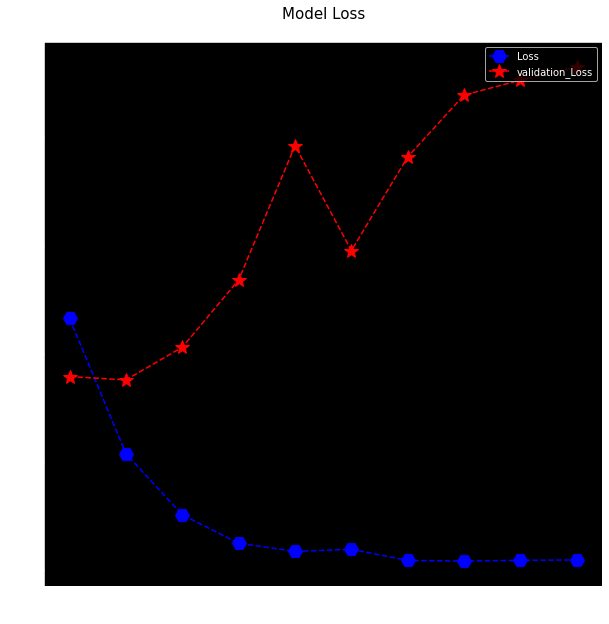

In [22]:
plt.figure(figsize=(10,10))
plt.style.use('dark_background')
plt.plot(history.history['loss'],label="Loss",marker="H",color="b",linestyle="--",markersize=14)
plt.plot(history.history['val_loss'],label="validation_Loss",marker="*",color="r",linestyle="--",markersize=14)
plt.title('Model Loss\n',color="black",fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

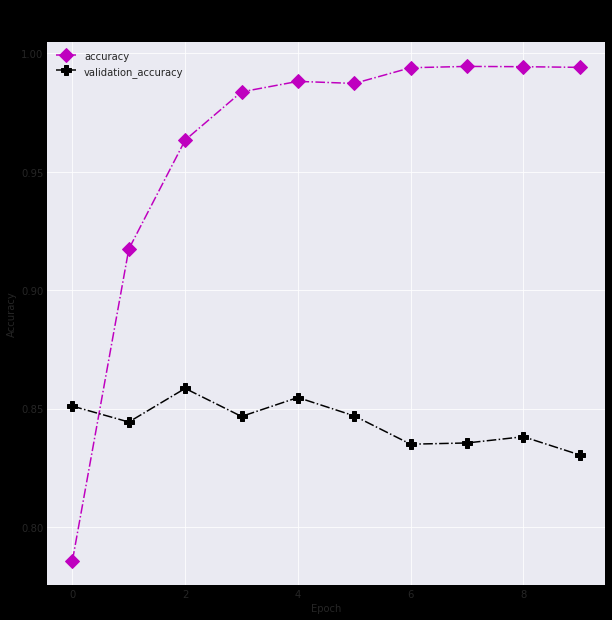

In [23]:
plt.figure(figsize=(10,10))
plt.style.use("seaborn-darkgrid")
plt.plot(history.history['accuracy'],label="accuracy",marker="D",color="m",markersize=10,linestyle="-.")
plt.plot(history.history['val_accuracy'],label="validation_accuracy",color="k",marker="P",markersize=10,linestyle="-.")
plt.title('Model Accuracy\n',fontsize=15,color="black")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.show()

In [24]:
pred=model.predict(test_data)
prediction=(pred>=0.5).astype(int)


# Accuracy Score

In [25]:
accuracy = accuracy_score(test_label,prediction)
print("Accuracy score is : ",accuracy)

Accuracy score is :  0.83044


# Precision Score

In [26]:
precision = precision_score(test_label,prediction)
print("Precision Score is :",precision)

Precision Score is : 0.7872591974407122


# Recall

In [27]:
recall = recall_score(test_label,prediction)
print("Recal is :",recall)

Recal is : 0.9056


# F1 Score

In [28]:
f1 = f1_score(test_label, prediction)
print("F1 Score :",f1)

F1 Score : 0.8422932400758957


In [29]:
label_name=["Negative","Positive"]

# Receiver Operating Characteristic Curve With Area Under Curve Score

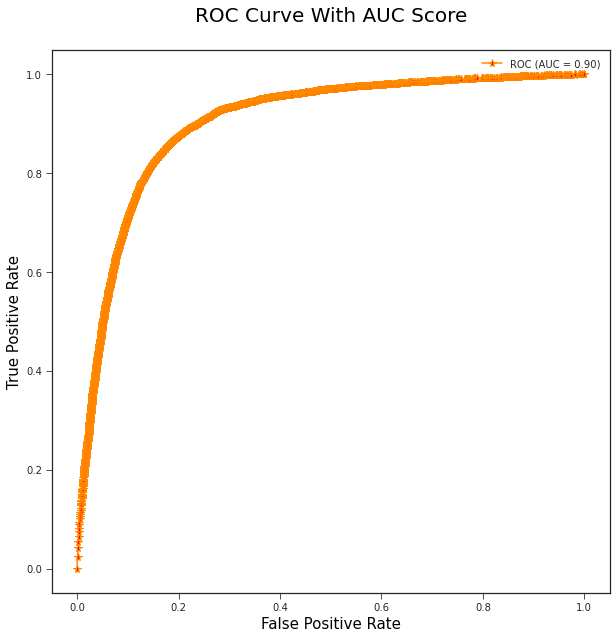

In [30]:
plt.figure(figsize=(10,10))
plt.style.use("seaborn-ticks")
# Generate predictions on the test data
y_pred = model.predict(test_data)

# Compute the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(test_label, pred)

# Compute the ROC AUC score
auc = roc_auc_score(test_label,pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC (AUC = {:.2f})'.format(auc),marker="*",color="darkorange",markersize=8,markerfacecolor="r")
plt.xlabel('False Positive Rate',fontsize=15,color="black")
plt.ylabel('True Positive Rate',fontsize=15,color="black")
plt.title('ROC Curve With AUC Score\n',fontsize=20,color="black")
plt.legend()
plt.show()


# Confusion Matrix

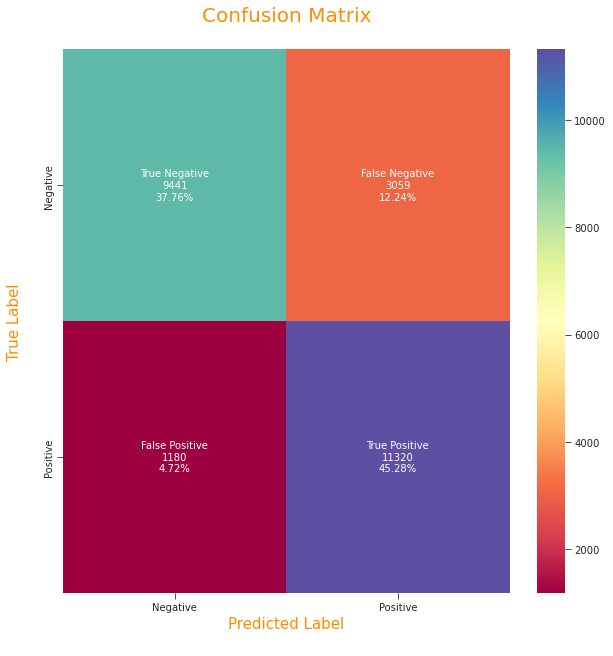

In [31]:
plt.figure(figsize=(10,10))

cf_matrix = confusion_matrix(test_label,prediction)
group_names = ["True Negative","False Negative","False Positive","True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Spectral',xticklabels=label_name,yticklabels=label_name)
plt.title("Confusion Matrix\n",fontsize=20,color="darkorange")
plt.xlabel("Predicted Label\n",color="darkorange",fontsize=15)
plt.ylabel("True Label\n",color="darkorange",fontsize=15)
plt.show()

In [32]:
print(classification_report(test_label,prediction,target_names=label_name))

              precision    recall  f1-score   support

    Negative       0.89      0.76      0.82     12500
    Positive       0.79      0.91      0.84     12500

    accuracy                           0.83     25000
   macro avg       0.84      0.83      0.83     25000
weighted avg       0.84      0.83      0.83     25000



# Make Prediction

In [33]:
word_index=imdb.get_word_index()

def encode_text(text):
    token=keras.preprocessing.text.text_to_word_sequence(text)
    token=[word_index[word] if word in word_index else 0 for word in token]
    return sequence.pad_sequences([token],max_len)[0]

text="that movie was amazing"
encode_data=encode_text(text)
print(encode_data)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

# Decode Function

In [34]:
reverse_word_index={value:key for (key,value) in word_index.items()}
def decode_integer(integer):
    pad=0
    text=" "
    for num in integer:
        if num !=pad:
            text +=reverse_word_index[num]+" "
    return text[: -1]

print(decode_integer(encode_data))

 that movie was amazing


In [35]:
def predict_data(text):
    encoded_text=encode_text(text)
    pred=np.zeros((1,300))
    pred[0]=encoded_text
    result=model.predict(pred)
    print(result[0])
    
positive_review="A classic of modern cinema, 'Pulp Fiction' is a triumph of style and storytelling. With a captivating narrative structure and a star-studded cast, this movie is a true work of art that should be experienced by all movie lovers."
predict_data(positive_review)

negative_review="A poorly written and poorly acted film, 'Fifty Shades of Grey' is a disappointment from start to finish. With a lack of chemistry between the lead actors and a nonsensical storyline, this movie is a waste of time"
predict_data(negative_review)

[0.99942744]
[0.5276419]


In [36]:
def predict_data(text):
    encoded_text=encode_text(text)
    pred=np.zeros((1,300))
    pred[0]=encoded_text
    result=model.predict(pred)
    return result[0][0]
    




In [37]:

test_text="The Shawshank Redemption' is a film that truly stands the test of time. With brilliant performances by Tim Robbins and Morgan Freeman, this movie will have you on the edge of your seat and leave you feeling inspired"

x=predict_data(test_text)
if (x >=0.5):
    print("positive")
else:
    print("Negative")

Negative
